In [1]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten,GlobalAveragePooling2D

## CIFAR-10 Dataset
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

https://www.cs.toronto.edu/~kriz/cifar.html

labels = [‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’]

## Read the data, Split to train test

In [2]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

[6]


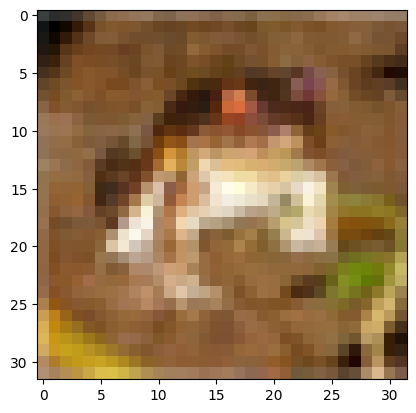

In [6]:
plt.imshow(X_train[0,:,:,:])
print(y_train[0])

[2]


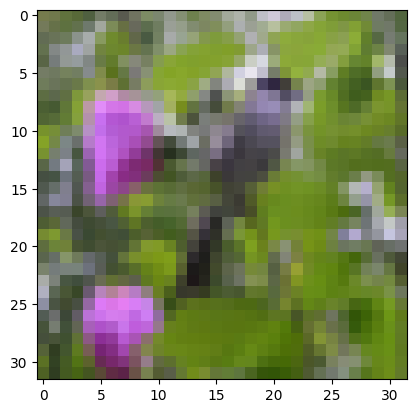

In [7]:
plt.imshow(X_train[300,:])
print(y_train[300])

In [8]:
X_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'Class distribution in training set')

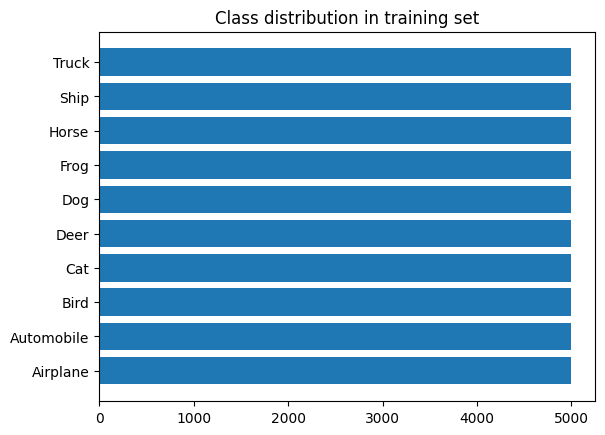

In [9]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

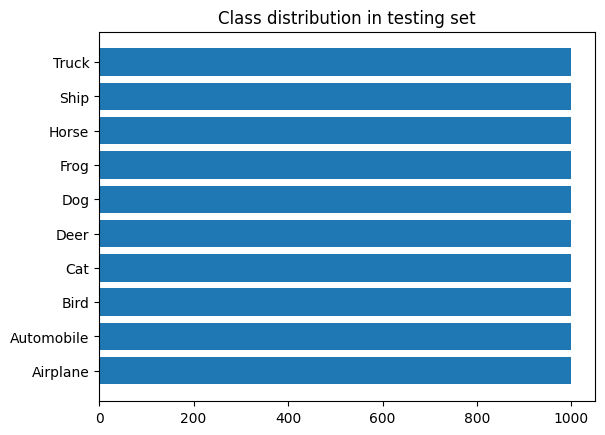

In [10]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

# Model building - CNN

In [33]:
tf.keras.backend.clear_session()

In [34]:
model=Sequential()
model.add(Conv2D(filters= 32,
                 input_shape=(32,32,3),
                 kernel_size=(3,3),
                 strides=1,
                 padding='same',
                 activation='relu'))

In [35]:
model.add(Conv2D(filters= 64,
                 kernel_size=(3,3),
                 strides=1,
                 padding='same',
                 activation='relu'))


In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 8409418 (32.08 MB)
Trainable params: 8409418 (32.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compile and fit

In [39]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10,shuffle=True, validation_data=[X_test,y_test])

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.3315 - accuracy: 0.5259 - val_loss: 1.0615 - val_accuracy: 0.6237
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9051 - accuracy: 0.6807 - val_loss: 1.0006 - val_accuracy: 0.6548
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6514 - accuracy: 0.7717 - val_loss: 0.9966 - val_accuracy: 0.6621
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4058 - accuracy: 0.8596 - val_loss: 1.1447 - val_accuracy: 0.6569
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2220 - accuracy: 0.9256 - val_loss: 1.4636 - val_accuracy: 0.6444
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1302 - accuracy: 0.9566 - val_loss: 1.8060 - val_accuracy: 0.6389
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0958 - accuracy: 0.9679 - val_loss: 2.1042 - val_ac

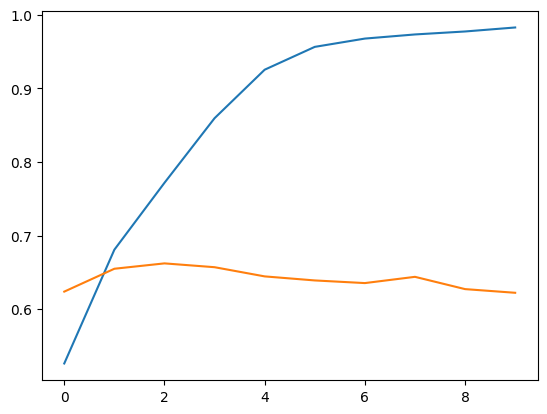

In [40]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
# save the model
model.save('cifar10_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Load the model and predict

In [ ]:
#load model
model=tf.keras.models.load_model('cifar10_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 32)        1

In [ ]:
#predict
y_pred=model.predict(X_test[0])

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [ ]:
pred=np.expand_dims(X_test[0],axis=0)
model.predict(pred)

NameError: name 'np' is not defined

## Evaluate the model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0712 - accuracy: 0.6402


[1.071221947669983, 0.6402000188827515]